<a href="https://colab.research.google.com/github/aryadeo/NEURAL_NETWORK_BASICS/blob/master/Pereptron/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron

In [0]:
import numpy as np
import pandas as pd

import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [0]:
X=breast_cancer.data
Y=breast_cancer.target

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [0]:
class Perceptron:

  def __init__(self):
    self.b=None
    self.w=None


  def model(self,X):
    return 1 if (np.dot(self.w,X)>=self.b) else 0


  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)



  def fit(self,X,Y,epochs=1,lr=1):       #default #epochs=1 and lr=1
    self.b=0
    self.w=np.ones(X.shape[1])

    accuracy=[]
    max_acc=0
    w_matrix=[]

    for i in range(epochs):

      for x,y in zip(X,Y):
        y_pred=self.model(x)

        if y==1 and y_pred==0:
          self.b=self.b+lr*1
          self.w =self.w+lr*x
        elif y==0 and y_pred==1:
          self.b=self.b-lr*1
          self.w=self.w-lr*x
      accuracy.append(accuracy_score(self.predict(X),Y))
      if (accuracy[i]>max_acc):
        max_acc=accuracy[i]
        ckpw=self.w
        ckpb=self.b
      w_matrix.append(self.w)
    self.w=ckpw
    self.b=ckpb##storing the w and b vaulue corresponding to maximum accuracy
    plt.plot(np.array(accuracy))
    plt.ylim([0,1])
    plt.show()
    print('maximum accuracy is:',max_acc)
    return np.array(w_matrix)

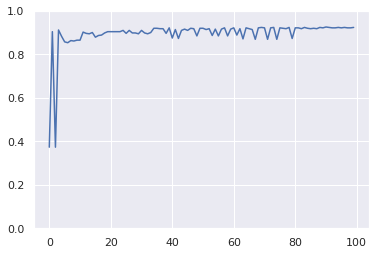

maximum accuracy is: 0.92578125


In [6]:
perceptron=Perceptron()
w_matrix=perceptron.fit(X_train,Y_train,100,0.01)